In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive
%cd 'My Drive'
%cd 'IS projects'
%cd Homework4
%cd Q1

[Errno 2] No such file or directory: 'drive'
/content/drive/My Drive/IS projects/Homework4/Q1
[Errno 2] No such file or directory: 'My Drive'
/content/drive/My Drive/IS projects/Homework4/Q1
[Errno 2] No such file or directory: 'IS projects'
/content/drive/My Drive/IS projects/Homework4/Q1
[Errno 2] No such file or directory: 'Homework4'
/content/drive/My Drive/IS projects/Homework4/Q1
[Errno 2] No such file or directory: 'Q1'
/content/drive/My Drive/IS projects/Homework4/Q1


In [ ]:
import pandas as pd
import random
import numpy as np
import itertools
import matplotlib.pyplot as plt
import matplotlib
from tabulate import tabulate
from copy import deepcopy

from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

#### Reading the data 

In [ ]:
def read_data(filename): return pd.read_csv(filename, index_col = None, header = None).to_numpy()

#### K-means class with different attributes and methods

In [ ]:
class Kmeans:

  def __init__(self, k):
    self.k = k
    self.clusters_data = np.zeros((k, train_data.shape[1]))
    self.centers_labels = np.zeros(k)

  def split_data(self, train_data):
    np.random.seed(0)
    new_centers = np.random.randn(self.k, train_data.shape[1])*np.std(train_data, axis = 0) + np.mean(train_data, axis = 0)
    #np.random.uniform(min(train_data.flatten()),max(train_data.flatten()),[k,train_data.shape[1]])
    error = np.linalg.norm(new_centers - self.clusters_data)
    while not error == 0 :
        self.clusters_data = deepcopy(new_centers)
        distances = np.array([np.linalg.norm(train_data - new_centers[k], axis=1) for k in range(self.k)])
        clusters = np.argmin(distances.T, axis = 1)
        new_centers = np.array([np.mean(train_data[clusters == k], axis=0) for k in range(self.k)])
        error = np.linalg.norm(new_centers - self.clusters_data)

  def find_centers_labels(self, train_data, train_labels): 
      train_labels = train_labels.flatten()
      distances = np.array([np.linalg.norm(train_data - self.clusters_data[k], axis=1) for k in range(self.k)])
      clusters = np.argmin(distances.T, axis = 1)
      self.centers_labels = np.array([np.argmax(np.bincount((train_labels[clusters == k]).astype(int))) for k in range(self.k)])
      return self.centers_labels


  def predict_datas_labels(self, test_data, test_labels):
    distances = np.array([np.linalg.norm(test_data - self.clusters_data[k], axis=1) for k in range(self.k)])
    clusters = np.argmin(distances.T, axis=1)
    predict = self.centers_labels[clusters]
    return predict


#### Calculating Accuracy

In [ ]:
def calculate_acc(predicted_label, test_label):
	return (predicted_label == test_label.flatten().astype(int)).mean()*100

In [ ]:
train_data = read_data('Train_Data.csv')
test_data = read_data('Test_Data.csv')
train_labels = read_data('Train_Labels.csv')
test_labels = read_data('Test_Labels.csv')

k = np.unique(train_labels).shape[0]

In [ ]:
my_kmeans = Kmeans(k)
my_kmeans.split_data(train_data)
my_kmeans.find_centers_labels(train_data, train_labels)
predicted = my_kmeans.predict_datas_labels(test_data, test_labels)

print('Accuracy of k-means with k =', k , 'is: %% %1.2f' %(calculate_acc(predicted, test_labels)))

Accuracy of k-means with k = 3 is: % 75.76




---
## Part 2.

#### Using sklearn


In [ ]:
def find_centers_labels(k, centers, train_data, train_labels): 
    train_labels = train_labels.flatten()
    distances = np.array([np.linalg.norm(train_data - centers[i], axis=1) for i in range(k)])
    clusters = np.argmin(distances.T, axis=1)
    centers_labels = np.array([np.argmax(np.bincount((train_labels[clusters == i]).astype(int))) for i in range(k)])
    return centers_labels

def predict_datas_labels(k, clusters_data, centers_labels, test_data, test_labels):
    distances = np.array([np.linalg.norm(test_data - clusters_data[i], axis=1) for i in range(k)])
    clusters = np.argmin(distances.T, axis=1)
    predict = centers_labels[clusters]
    return predict

In [ ]:
kmeans = KMeans(n_clusters = k)
kmeans = kmeans.fit(train_data)
labels = kmeans.predict(test_data)
centroids = kmeans.cluster_centers_
centers_labels = find_centers_labels(k, centroids, train_data, train_labels)
predicted_sk = predict_datas_labels(k, centroids, centers_labels, test_data, test_labels)

print('Accuracy of k-means with k =', k , 'using sklearn is: %% %1.2f' %(calculate_acc(predicted_sk, test_labels)))


Accuracy of k-means with k = 3 using sklearn is: % 75.76



---
## Part 3.

#### Plotting Confusion Matrix

In [ ]:
def make_confusion_matrix(test_labels, predicted_labels):
  class_labels = np.unique(test_labels)  
  return np.array([[np.sum((test_labels == class_labels[i]) & (predicted_labels == class_labels[j])) for j in range(len(class_labels))] for i in  range(len(class_labels))]) 

In [ ]:
def plot_confusion_matrix(matrix, classes, normalize=False, title='Confusion matrix', cmap = plt.cm.gist_yarg):
    plt.figure(figsize = (5,5))
    plt.imshow(matrix, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 10, fontweight = 'bold')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, matrix[i, j], ha='center', va='center', color='white' if matrix[i,j]>thresh else 'grey')
    plt.ylabel('True Labels', fontsize = 10, fontweight = 'bold')
    plt.xlabel('Predicted Lables', fontsize = 10, fontweight = 'bold')
    plt.show()

#### Confusion Matrix 

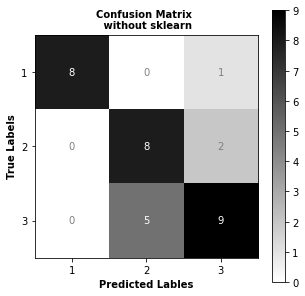

In [ ]:
confusion_matrix = make_confusion_matrix(test_labels[:,0], predicted)
plot_confusion_matrix(confusion_matrix, ['1', '2', '3'], title = 'Confusion Matrix \n without sklearn')

#### Confusion Matrix - sklearn

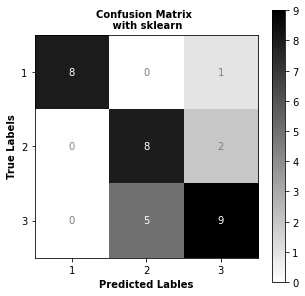

In [ ]:
confusion_matrix = make_confusion_matrix(test_labels[:,0], predicted_sk)
plot_confusion_matrix(confusion_matrix, ['1', '2', '3'], title = 'Confusion Matrix \n with sklearn')



---

